# Vương Thanh Linh
# MSSV: 21521082

## 1. Đọc dữ liệu

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import fpgrowth

In [13]:
df = pd.read_excel('Online Retail.xlsx', engine='openpyxl')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 2. Tiền xử lý dữ liệu

In [14]:
df['Description'] = df['Description'].str.strip()
df.dropna(axis=0, subset=['InvoiceNo'], inplace=True)
df['InvoiceNo'] = df['InvoiceNo'].astype('str')
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## 3. Xóa hóa đơn tín dụng (Chứa kí tự 'C')

In [15]:
df[df.InvoiceNo.str.contains('C', na=False)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom


In [16]:
df = df[~df['InvoiceNo'].str.contains('C')]
df[df.InvoiceNo.str.contains('C', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## 4. Thống kê dữ liệu theo từng quốc gia

<Axes: ylabel='Country'>

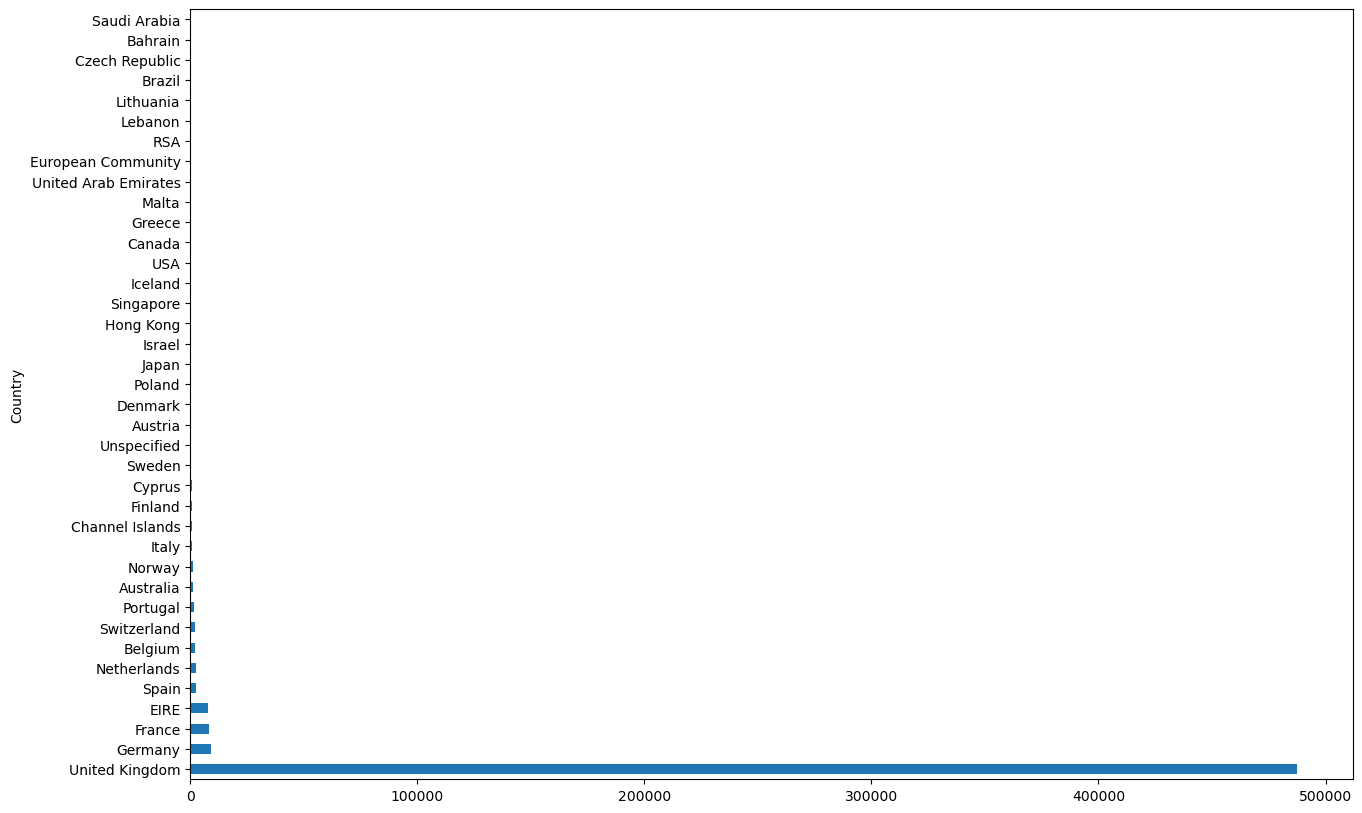

In [18]:
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

## 5. Xét hóa đơn tại nước Anh theo InvoiceNo và Tên mặt hàng

In [21]:
basket = df[df.Country == "United Kingdom"].groupby(['InvoiceNo', 'Description'])['Quantity']

## 6. Chuyển đổi dữ liệu về hot-encoding

In [22]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')
basket.head(10)

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 7. Tạo hàm biến đổi dữ liêu có số lượng (Quantity)

In [23]:
def encode_data(data):
    if data <= 0:
        return 0
    if data >= 1:
        return 1

In [26]:
basket = basket.map(encode_data)
basket.head(10)

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536374,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 8. Xóa cột 'POSTAGE'

In [27]:
basket.drop('POSTAGE', inplace=True, axis=1)

## 9. Apriori với min_support = 3%

In [36]:
itemsets = apriori(basket.astype('bool'), min_support=0.03, use_colnames=True)
itemsets.head(10)

,support,itemsets
0,0.045803,(6 RIBBONS RUSTIC CHARM)
1,0.031124,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.040339,(60 TEATIME FAIRY CAKE CASES)
3,0.046928,(ALARM CLOCK BAKELIKE GREEN)
4,0.035142,(ALARM CLOCK BAKELIKE PINK)
5,0.049821,(ALARM CLOCK BAKELIKE RED)
6,0.036214,(ANTIQUE SILVER T-LIGHT GLASS)
7,0.073445,(ASSORTED COLOUR BIRD ORNAMENT)
8,0.042267,(BAKING SET 9 PIECE RETROSPOT)
9,0.035089,(BATHROOM METAL SIGN)


## 10. Tạo luật kết hợp với min_conf = 50%

In [30]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
 9   zhangs_metric       10 non-null     float64
dtypes: float64(8), object(2)
memory usage: 932.0+ bytes


In [33]:
rules['antecedents'] = rules['antecedents'].apply(lambda x: list(x)[0]).astype("unicode")
rules['consequents'] = rules['consequents'].apply(lambda x: list(x)[0]).astype("unicode")   
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], ' ==> ', rules.loc[i, 'consequents'],
          ' [', rules.loc[i, 'support'], ', ', rules.loc[i, 'confidence'], ']')

ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE RED  [ 0.030160175711148016 ,  0.6426940639269406 ]
ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE GREEN  [ 0.030160175711148016 ,  0.6053763440860216 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  PINK REGENCY TEACUP AND SAUCER  [ 0.030910162318530027 ,  0.6177730192719486 ]
PINK REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER  [ 0.030910162318530027 ,  0.8207681365576103 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  ROSES REGENCY TEACUP AND SAUCER  [ 0.03755290084105641 ,  0.7505353319057816 ]
ROSES REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER  [ 0.03755290084105641 ,  0.7324973876698014 ]
JUMBO  BAG BAROQUE BLACK WHITE  ==>  JUMBO BAG RED RETROSPOT  [ 0.03053516901483902 ,  0.6263736263736264 ]
JUMBO BAG PINK POLKADOT  ==>  JUMBO BAG RED RETROSPOT  [ 0.042052820485348474 ,  0.6773080241587576 ]
JUMBO SHOPPER VINTAGE RED PAISLEY  ==>  JUMBO BAG RED RETROSPOT  [ 0.03519580007499866 ,  0.5798764342453663 ]

## 11. Lấy giá trị độ hỗ trợ và độ tin cậy

<Axes: title={'center': 'Association Rules'}, xlabel='support', ylabel='confidence'>

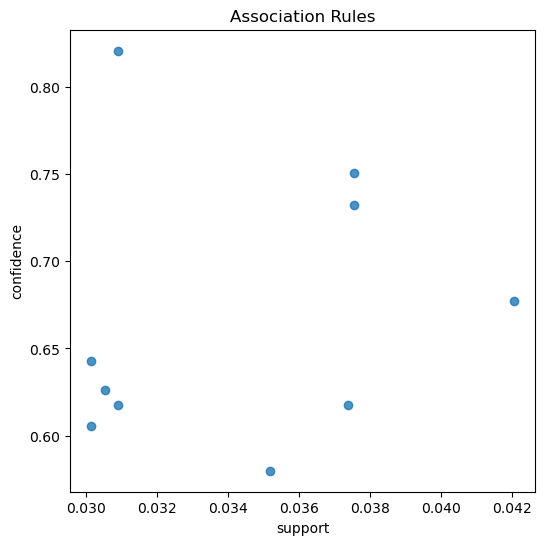

In [34]:
support = rules['support'].values
confidence = rules['confidence'].values
# Plot
plt.figure(figsize=(6,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support, y=confidence, fit_reg=False)

## 12. Tìm tập phổ biến bằng FP-Growth

In [41]:
itemsets_fp = fpgrowth(basket.astype('bool'), min_support=0.03, use_colnames=True)
itemsets_fp.tail(10)

,support,itemsets
121,0.035089,(JUMBO BAG VINTAGE DOILY)
122,0.040446,(HOT WATER BOTTLE KEEP CALM)
123,0.042053,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA..."
124,0.037392,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)"
125,0.030535,"(JUMBO BAG RED RETROSPOT, JUMBO BAG BAROQUE B..."
126,0.035196,"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG..."
127,0.030160,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL..."
128,0.032517,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS..."
129,0.037553,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC..."
130,0.030910,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY..."


In [42]:
itemsets.tail(10)

,support,itemsets
121,0.057642,(WOODEN PICTURE FRAME WHITE FINISH)
122,0.036589,(WOODLAND CHARLOTTE BAG)
123,0.030160,"(ALARM CLOCK BAKELIKE GREEN, ALARM CLOCK BAKEL..."
124,0.030910,"(GREEN REGENCY TEACUP AND SAUCER, PINK REGENCY..."
125,0.037553,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC..."
126,0.030535,"(JUMBO BAG RED RETROSPOT, JUMBO BAG BAROQUE B..."
127,0.042053,"(JUMBO BAG RED RETROSPOT, JUMBO BAG PINK POLKA..."
128,0.035196,"(JUMBO BAG RED RETROSPOT, JUMBO SHOPPER VINTAG..."
129,0.037392,"(JUMBO BAG RED RETROSPOT, JUMBO STORAGE BAG SUKI)"
130,0.032517,"(LUNCH BAG BLACK SKULL., LUNCH BAG RED RETROS..."
